### Librerire necessarie:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Importo i dati della protezione civile

In [13]:
dati = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')
for col in dati.columns:print(col) #stampo colonne per debug

data
stato
ricoverati_con_sintomi
terapia_intensiva
totale_ospedalizzati
isolamento_domiciliare
totale_positivi
variazione_totale_positivi
nuovi_positivi
dimessi_guariti
deceduti
casi_da_sospetto_diagnostico
casi_da_screening
totale_casi
tamponi
casi_testati
note


## Calcolo: Nuovi tamponi

Il dato dei tamponi è espresso in maniera cumulata. Per avere i nuovi tamponi effettuati rispetto al giorno precedente calcolo la colonna **nuovi_tamponi** come differenza rispetto al giorno precedente.

In [3]:
dati['nuovi_tamponi']=dati['tamponi'].diff(1)

e ne faccio il grafico

<Figure size 432x288 with 0 Axes>

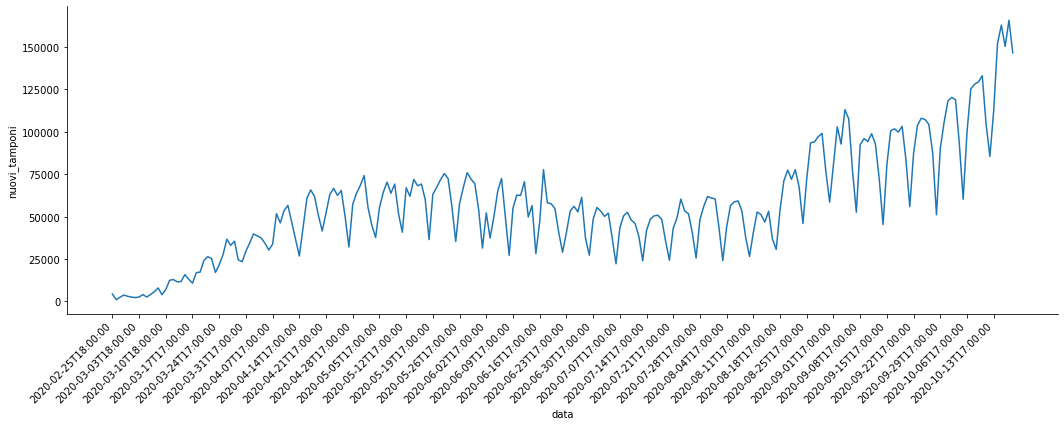

In [4]:
plt.figure()
g=sns.relplot(
    x="data", y="nuovi_tamponi", # <----------la riga che ti interessa leggere
    kind="line", data=dati, 
    height=5, aspect=3);
g.set_xticklabels(step=7, rotation=45, horizontalalignment='right')

## Nuovi casi testati

Come sopra, anche il dato **casi testati** è dato in maniera cumulata. Calcolo il dato giornaliero dei nuovi casi testati.

Questo calcolo non esclude che un "reinfettato" compaia due volte nel conteggio: sono la stessa persona, ma sono due casi separati.

In [5]:
dati['nuovi_casi']=dati['casi_testati'].diff(1)

Notare che la colonna dei casi testati è stata aggiunta ad Aprile, quindi dopo quell'articolo del Sole 24 Ore che suggeriva di guaradre la colonna **variazione_totale_positivi**.

<Figure size 432x288 with 0 Axes>

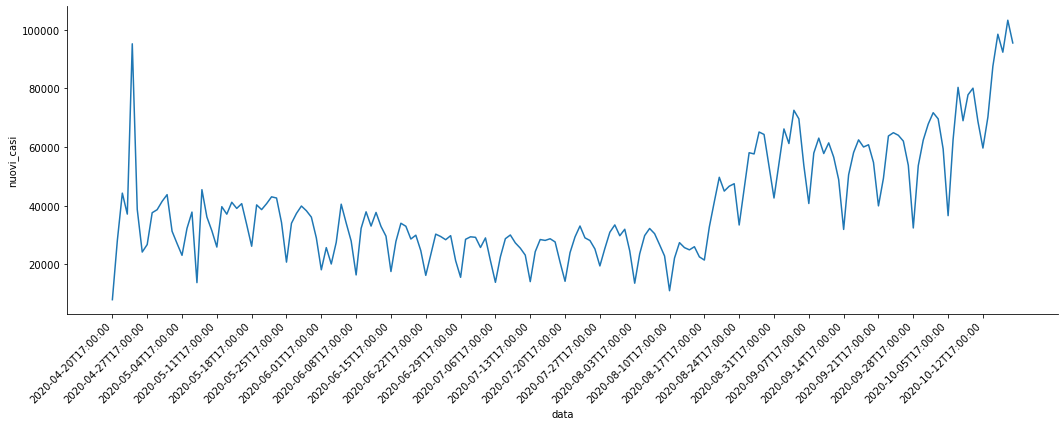

In [6]:
plt.figure()
g=sns.relplot(
    x="data", y="nuovi_casi", # <----------
    kind="line", data=dati, 
    height=5, aspect=3);
g.set_xticklabels(step=7, rotation=45, horizontalalignment='right')

Il dato ottenuto dei nuovi casi giornalieri testati indica la somma di "nuovi positivi" + "ospedalizzati" + "guariti e dimessi". La wiki secondo me sbaglia la definizione, o comunque crea più dubbi del nome della varibile che invece è chiarissimo.

Faccio il grafico delle due colonne calcolate **nuovi casi** e **nuovi tamponi** assieme alla colonna già presente nei dati **nuovi positivi**

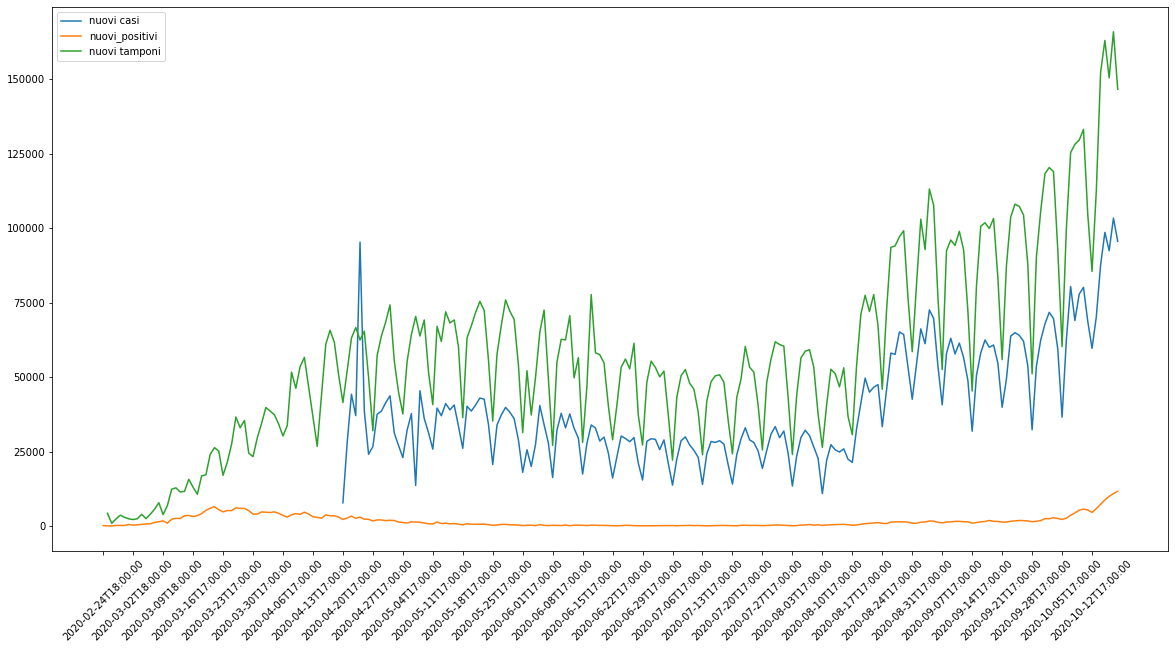

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
x = dati['data']
y1 = dati['nuovi_casi']
y2 = dati['nuovi_positivi']
y3 = dati['nuovi_tamponi']
ax.plot(x,y1, label='nuovi casi')
ax.plot(x,y2, label='nuovi_positivi')
ax.plot(x,y3, label='nuovi tamponi')
ax.legend()
ax.tick_params(axis='x', rotation=45)
ax.set_xticks(ax.get_xticks()[::7])
plt.show()

I tamponi ovviamente sono più dei nuovi casi perché al loro interno ci sono anche i controlli.
Il numero di tamponi negativi è la differenza tra il numero dei tamponi di un giorno e i nuovi casi di quel giorno.

In [8]:
dati['tamponi_negativi']=dati['nuovi_tamponi']-dati['nuovi_casi']

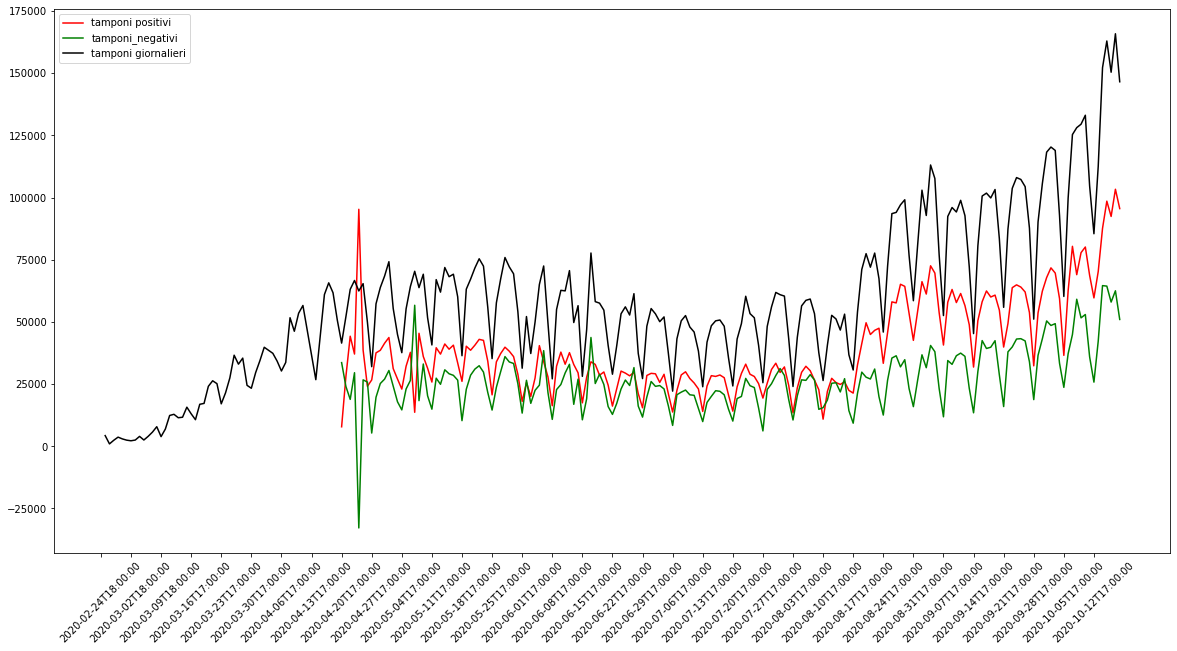

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
x = dati['data']
y1 = dati['nuovi_casi']
y2 = dati['tamponi_negativi']
y3 = dati['nuovi_tamponi']
ax.plot(x,y1,'r', label='tamponi positivi')
ax.plot(x,y2,'g', label='tamponi_negativi')
ax.plot(x,y3,'k', label='tamponi giornalieri')
ax.legend()
ax.tick_params(axis='x', rotation=45)
ax.set_xticks(ax.get_xticks()[::7])
plt.show()

Ora se prendo quello che stando al mio ragionamento sono i tamponi positivi, osservo che la colonna **nuovi positivi** è sempre una frazione dei tamponi positivi. Il motivo è che un numero relativamente grande di tamponi sono i controlli non ancora negativizzati.

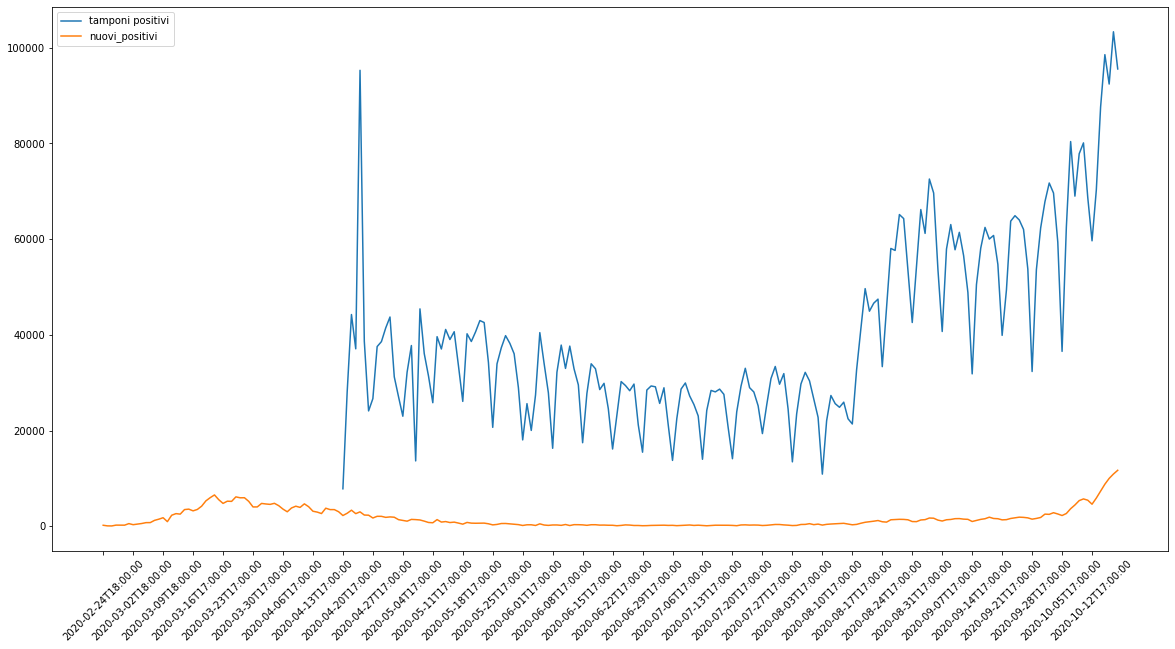

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
x = dati['data']
y1 = dati['nuovi_casi'] # aka tamponi positivi
y2 = dati['nuovi_positivi']

ax.plot(x,y1, label='tamponi positivi')
ax.plot(x,y2, label='nuovi_positivi')

ax.legend()
ax.tick_params(axis='x', rotation=45)
ax.set_xticks(ax.get_xticks()[::7])
plt.show()

Visto che abbiamo (credo) i numeri, possiamo graficare il rapporto percentuale dei nuovi positivi con il numero dei tamponi positivi trovati in una giornata.

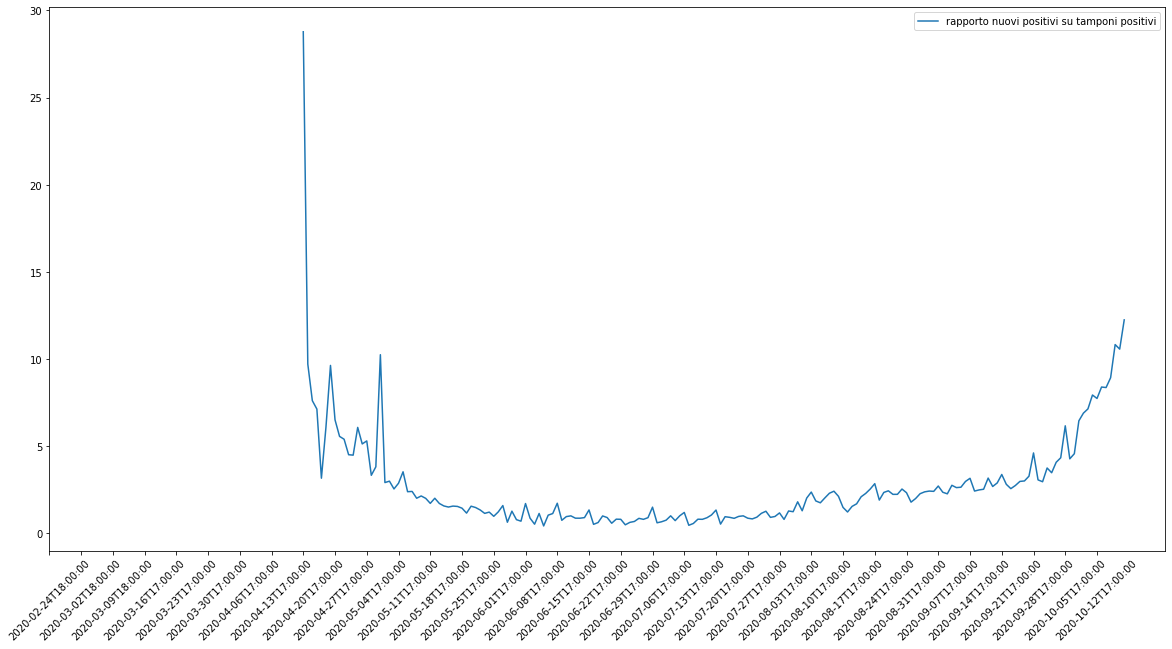

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
x = dati['data']
y1 = dati['nuovi_positivi']/dati['nuovi_casi']*100 # aka tamponi positivi

ax.plot(x,y1, label='rapporto nuovi positivi su tamponi positivi')


ax.legend()
ax.tick_params(axis='x', rotation=45)
ax.set_xticks(ax.get_xticks()[::7])
plt.show()

Per me dal grafico sopra si vede molto bene che ad Aprile si facevano i tamponi solo ai positivi e ai fortemente sospetti. In estate c'era un gran numero di tamponi di controllo e se ne trovavano pochi di nuovi. Ora per ogni 100 tamponi effettuati si stanno trovando molti più positivi rispetto a quest'estate.